<a href="https://colab.research.google.com/github/Galileo-dev/OpenAiGym/blob/master/PythonNeuralNetworksTutorial/FirstNeuralNetworkwithTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Tensorflow
Use the correct version of tensorflow. 
Note: This is only nessasary for colab hence the try and exception.

In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
  pass



In [ ]:
#Import Libs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Version Notice!
This code assumes you are using tensorflow 2.x or later, and python 3.6 or later

In [ ]:
print("Tensorflow version:", tf.__version__)
print("Numpy version:", np.__version__)


Tensorflow version: 2.2.0
Numpy version: 1.18.5


#Request File from user (.csv)

In [ ]:
from google.colab import files

uploaded = files.upload()

csv_housefile = next(iter(uploaded.keys()))
print('User File "{name}" with {length} bytes'. format(
    name=csv_housefile, length=len(uploaded[csv_housefile])))


Saving AmesHousing-05-2010.csv to AmesHousing-05-2010 (1).csv
User File "AmesHousing-05-2010.csv" with 20140 bytes


#Load the data into Pandas dataframe

In [ ]:
import pandas as pd
df_housing = pd.read_csv(csv_housefile)

pd.set_option('display.max_columns', None)

df_housing.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2,528,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,13,527166040,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,789,789,GasA,Gd,Y,SBrkr,789,676,0,1465,0,0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,180400
2,38,528112020,20,RL,98.0,11478,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,No,GLQ,1218,Unf,0,486,1704,GasA,Ex,Y,SBrkr,1704,0,0,1704,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,RFn,3,772,TA,TA,Y,0,50,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
3,56,528240070,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
4,59,528292020,60,RL,NaN,9505,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,180.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,884,1151,0,2035,0,0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2001.0,Fin,2,434,TA,TA,Y,144,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,222500


#Preparing Data

In [ ]:

df_housing[['Total Bsmt SF', 'Gr Liv Area']].isnull().values.any() #Check for Null values

df_housing['Total SF'] = df_housing['Total Bsmt SF'] + df_housing ['Gr Liv Area']
print(df_housing[['Total Bsmt SF', 'Gr Liv Area', 'Total SF', 'SalePrice']].head(5))

   Total Bsmt SF  Gr Liv Area  Total SF  SalePrice
0           1080         1656      2736     215000
1            789         1465      2254     180400
2           1704         1704      3408     306000
3            860         1960      2820     216500
4            884         2035      2919     222500


#Visualize The data

In [ ]:

# This function visualizes our data and optionally a learned line
def visualize_data(x_vals, y_vals,
                   addn_x_vals=None, addn_y_vals=None, add_addn_reg_line=False):
  
  f, ax = plt.subplots(figsize=(8,8))
  plt.plot(x_vals, y_vals, 'ro')   # red dot for each data point
  # Optionally plot another set of data points in a different color and symbol
  if (addn_x_vals is not None):
    plt.plot(addn_x_vals, addn_y_vals, 'g^') # green triangles for additional data points
    # Optionally, plot a regression line.
    if (add_addn_reg_line):
      x_min_index = addn_x_vals.argmin()
      x_max_index = addn_x_vals.argmax()
      print(x_min_index,[addn_x_vals[x_min_index],addn_y_vals[x_min_index]] ) 
      print(x_max_index,[addn_x_vals[x_max_index],addn_y_vals[x_max_index]] ) 
      plt.plot([addn_x_vals[x_min_index],addn_y_vals[x_min_index]], 
               [addn_x_vals[x_max_index],addn_y_vals[x_max_index]], 
               'b-')  # draw a blue regression line
    
  plt.tick_params(axis='both', which='major', labelsize=14)
  
  plt.show()  # now plot the line showing the data and the optional line

#Scale Data

In [ ]:
# Scale Data
from sklearn.preprocessing import MinMaxScaler

sf_scaler = MinMaxScaler()
sf_scaled = sf_scaler.fit_transform(df_housing['Total SF'].values.reshape(-1, 1).astype(np.float64))

price_scaler = MinMaxScaler()
price_scaled = price_scaler.fit_transform(df_housing['SalePrice'].values.reshape(-1, 1).astype(np.float64))

#Perdicting House Price(£) based on House Size(m²)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(1, ), 
                                kernel_initializer='random_uniform',
                                bias_initializer='zeros'))


#Compile the model

In [ ]:
optimizer = "sgd"
model.compile(loss='mean_squared_error', optimizer=optimizer)

#Train the model

##Split Data

In [ ]:
from sklearn.model_selection import train_test_split

sf_train_scaled, sf_test_scaled, price_train_scaled, price_test_scaled = train_test_split(sf_scaled, 
                                                                                          price_scaled,
                                                                                          test_size=0.3, random_state=42)

##Train with 8 epochs

In [ ]:
intial_epochs = 8
batch_size = 10
train_hist = model.fit(sf_train_scaled, price_train_scaled,
                       epochs = intial_epochs, batch_size = batch_size, verbose=1)

Epoch 1/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1862
Epoch 2/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1594
Epoch 3/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1393
Epoch 4/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1215
Epoch 5/8
5/5 [==============================] - 0s 2ms/step - loss: 0.1024
Epoch 6/8
5/5 [==============================] - 0s 2ms/step - loss: 0.0907
Epoch 7/8
5/5 [==============================] - 0s 2ms/step - loss: 0.0786
Epoch 8/8
5/5 [==============================] - 0s 2ms/step - loss: 0.0718


##Train with 1200 epochs

In [ ]:
addn_epochs = 1200
train_hist_addn = model.fit(sf_train_scaled, price_train_scaled,
                       epochs = addn_epochs, verbose=1)

Epoch 1/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0671
Epoch 2/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0648
Epoch 3/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 4/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0614
Epoch 5/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 6/1200
2/2 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 7/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 8/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0559
Epoch 9/1200
2/2 [==============================] - 0s 1ms/step - loss: 0.0545
Epoch 10/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0532
Epoch 11/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 12/1200
2/2 [==============================] - 0s 2ms/step - loss: 0.0507
Epoch 13/1200
2/2 [==============================

#Confirm Model Training

<class 'tensorflow.python.keras.callbacks.History'>


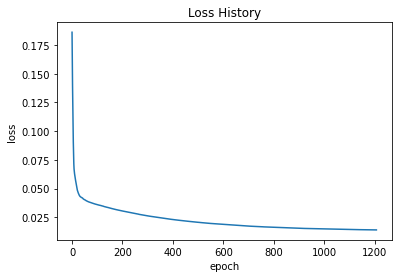

In [ ]:
def plot_loss(hist):
  #plot loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

print(type(train_hist))
train_hist.history['loss'].extend(train_hist_addn.history['loss'])
plot_loss(train_hist)

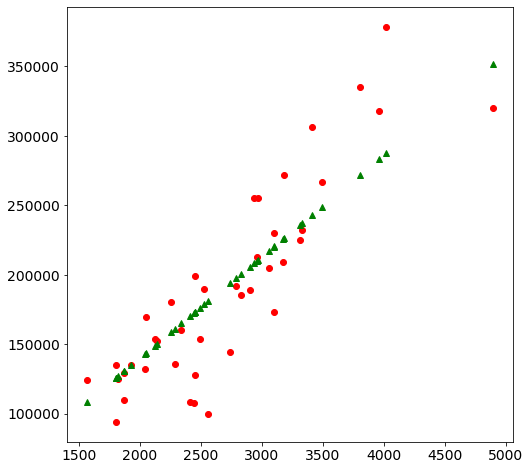

In [ ]:
price_predicted_scaled = model.predict(sf_train_scaled)
visualize_data(sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_train_scaled),
               sf_scaler.inverse_transform(sf_train_scaled), price_scaler.inverse_transform(price_predicted_scaled),
               add_addn_reg_line=False)